## Duygu Analizi

### Önemli Kütüphaneler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emrek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\emrek\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\emrek\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\emrek\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Veriyi Okuma

In [2]:
#review_data = pd.read_json('datasets\yelp_academic_dataset_review.json', lines=True)
import json
with open('datasets\yelp_academic_dataset_review.json') as json_file:      
    review_data = json_file.readlines()
    # Bu satır 7 milyon satırlık verinin tümünü işlediğinden yaklaşık 4-5 dk bir süre almaktadır. 
    review_data = list(map(json.loads, review_data)) 

review_df= pd.DataFrame(review_data)
json_file.close()

In [3]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## Quick EDA

In [4]:
review_df['stars'].value_counts()

stars
5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: count, dtype: int64

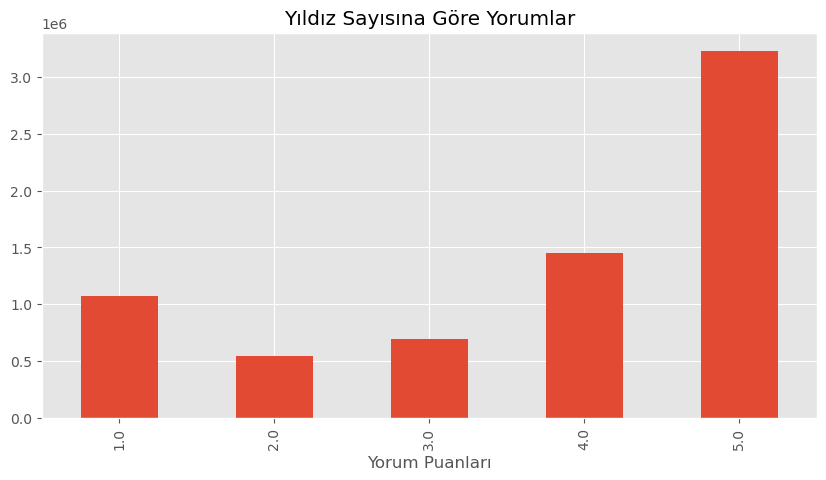

In [5]:
ax = review_df['stars'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Yıldız Sayısına Göre Yorumlar',
          figsize=(10, 5))
ax.set_xlabel('Yorum Puanları')
plt.show()

## Basitçe NLTK

In [6]:
example = review_df['text'][50]
print(example)

We started with the artichoke dip, big mistake. It was cold and the chips were stale. Mentioned to our waitress, but nothing came of it.  We ordered a large pizza, thin crust which after adding toppings it was a bit pricey for pizza.  Pizza was ok, not great. Except for not being our advocate our server was good.  I have been here before for Cardinals game, it was better then. Will try another venue next time.


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['We',
 'started',
 'with',
 'the',
 'artichoke',
 'dip',
 ',',
 'big',
 'mistake',
 '.']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('We', 'PRP'),
 ('started', 'VBD'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('artichoke', 'NN'),
 ('dip', 'NN'),
 (',', ','),
 ('big', 'JJ'),
 ('mistake', 'NN'),
 ('.', '.')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  started/VBD
  with/IN
  the/DT
  artichoke/NN
  dip/NN
  ,/,
  big/JJ
  mistake/NN
  ./.
  It/PRP
  was/VBD
  cold/JJ
  and/CC
  the/DT
  chips/NNS
  were/VBD
  stale/JJ
  ./.
  Mentioned/VBN
  to/TO
  our/PRP$
  waitress/NN
  ,/,
  but/CC
  nothing/NN
  came/VBD
  of/IN
  it/PRP
  ./.
  We/PRP
  ordered/VBD
  a/DT
  large/JJ
  pizza/NN
  ,/,
  thin/JJ
  crust/NN
  which/WDT
  after/IN
  adding/VBG
  toppings/NNS
  it/PRP
  was/VBD
  a/DT
  bit/NN
  pricey/NN
  for/IN
  pizza/NN
  ./.
  (PERSON Pizza/NNP)
  was/VBD
  ok/RB
  ,/,
  not/RB
  great/JJ
  ./.
  Except/IN
  for/IN
  not/RB
  being/VBG
  our/PRP$
  advocate/NN
  our/PRP$
  server/NN
  was/VBD
  good/JJ
  ./.
  I/PRP
  have/VBP
  been/VBN
  here/RB
  before/IN
  for/IN
  (PERSON Cardinals/NNP)
  game/NN
  ,/,
  it/PRP
  was/VBD
  better/RBR
  then/RB
  ./.
  (PERSON Will/NNP)
  try/VB
  another/DT
  venue/NN
  next/JJ
  time/NN
  ./.)


## Adım 1) VADER Duygu Puanlaması

This uses a "bag of words" approach:
    Stop words are removed
    Each word is scored and combined to a total score.

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Process bar ile işlem takibi
from tqdm.notebook import tqdm


sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emrek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [13]:
sia.polarity_scores(example)

{'neg': 0.073, 'neu': 0.803, 'pos': 0.124, 'compound': 0.6552}

In [14]:
# Tüm veri seti ile çalışma
res = {}
for i, row in tqdm(review_df.iterrows(), total=len(review_df)):
    text = row['text']
    myid = row['review_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/6990280 [00:00<?, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'review_id'})
vaders = vaders.merge(review_df, how='left')

In [16]:
vaders.head()

,review_id,neg,neu,pos,compound,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,0.000,0.888,0.112,0.8597,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,0.050,0.705,0.245,0.9858,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,0.035,0.709,0.257,0.9201,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,0.000,0.660,0.340,0.9588,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,0.017,0.711,0.272,0.9804,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## VADER Sonuç Grafiği

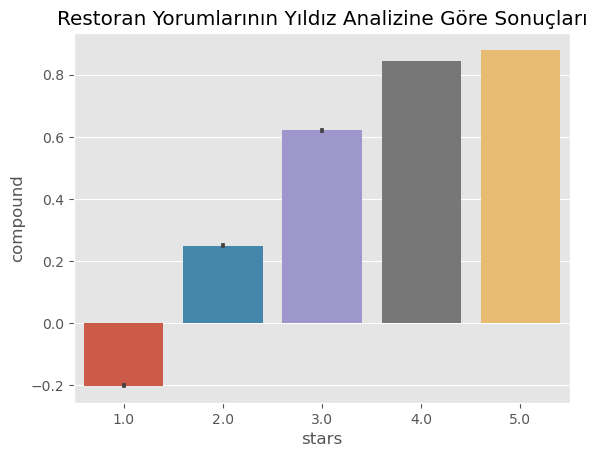

In [17]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Restoran Yorumlarının Yıldız Analizine Göre Sonuçları')
plt.show()

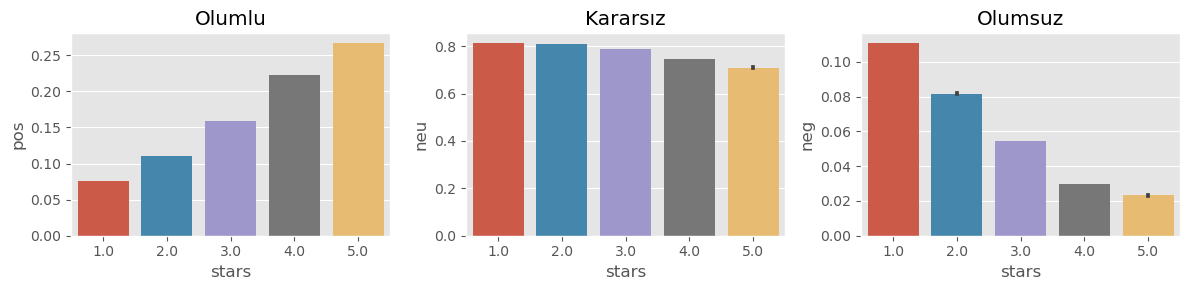

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Olumlu')
axs[1].set_title('Kararsız')
axs[2].set_title('Olumsuz')
plt.tight_layout()
plt.show()

In [41]:
#Sonuç dataframe olarak dosyaya yazılır (csv)
vaders.to_csv("results/vader-result.csv", index=False)

In [42]:
#Sonuç dataframe olarak dosyaya yazılır (sql)

import pandas as pd
from sqlalchemy import create_engine

engine= create_engine("sqlite:///database/restaurant_reviews.db", echo=True)
vaders.to_sql("vader-review_scores", con=engine, if_exists="replace", index=False)

engine.dispose()

2024-01-16 09:54:50,595 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-16 09:54:51,333 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("vader-review_scores")
2024-01-16 09:54:51,333 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-16 09:54:51,334 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("vader-review_scores")
2024-01-16 09:54:51,334 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-16 09:54:51,334 INFO sqlalchemy.engine.Engine 
CREATE TABLE "vader-review_scores" (
	review_id TEXT, 
	neg FLOAT, 
	neu FLOAT, 
	pos FLOAT, 
	compound FLOAT, 
	user_id TEXT, 
	business_id TEXT, 
	stars FLOAT, 
	useful BIGINT, 
	funny BIGINT, 
	cool BIGINT, 
	text TEXT, 
	date TEXT
)


2024-01-16 09:54:51,334 INFO sqlalchemy.engine.Engine [no key 0.00074s] ()


## Adım 2) Roberta Önceden Eğitilmiş Modeli

Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
# VADER results on example
print(example)
sia.polarity_scores(example)

We started with the artichoke dip, big mistake. It was cold and the chips were stale. Mentioned to our waitress, but nothing came of it.  We ordered a large pizza, thin crust which after adding toppings it was a bit pricey for pizza.  Pizza was ok, not great. Except for not being our advocate our server was good.  I have been here before for Cardinals game, it was better then. Will try another venue next time.


{'neg': 0.073, 'neu': 0.803, 'pos': 0.124, 'compound': 0.6552}

In [22]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.30550435, 'roberta_neu': 0.4082894, 'roberta_pos': 0.28620628}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

### Kontroller

In [24]:
#size 
#model.config.vocab_size

In [25]:
#size 
#tokenizer.vocab_size

In [26]:
#len(review_df["text"][18981])

In [ ]:
res = {}
with open("broke.txt", "a") as ctxt:
    for i, row in tqdm(review_df.iterrows(), total=len(review_df)): 
        #if i == 200000:
        #    break
        if len(review_df["text"][i]) >= 1500:
            ctxt.write(f"Index error for id {myid}\n")
            continue
        try:
            text = row['text']
            myid = row['review_id']
            vader_result = sia.polarity_scores(text)
            vader_result_rename = {}
            for key, value in vader_result.items():
                vader_result_rename[f"vader_{key}"] = value
            roberta_result = polarity_scores_roberta(text)
            both = {**vader_result_rename, **roberta_result}
            res[myid] = both
        except RuntimeError :
            #print(f'Broke for id {myid}')
            ctxt.write(f"Broke for id {myid}\n")
            continue
ctxt.close()

  0%|          | 0/200000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'review_id'})
results_df = results_df.merge(review_df, how='left')

## VADER ile Roberta Karşılaştırması

c:\Users\emrek\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emrek\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emrek\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emrek\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

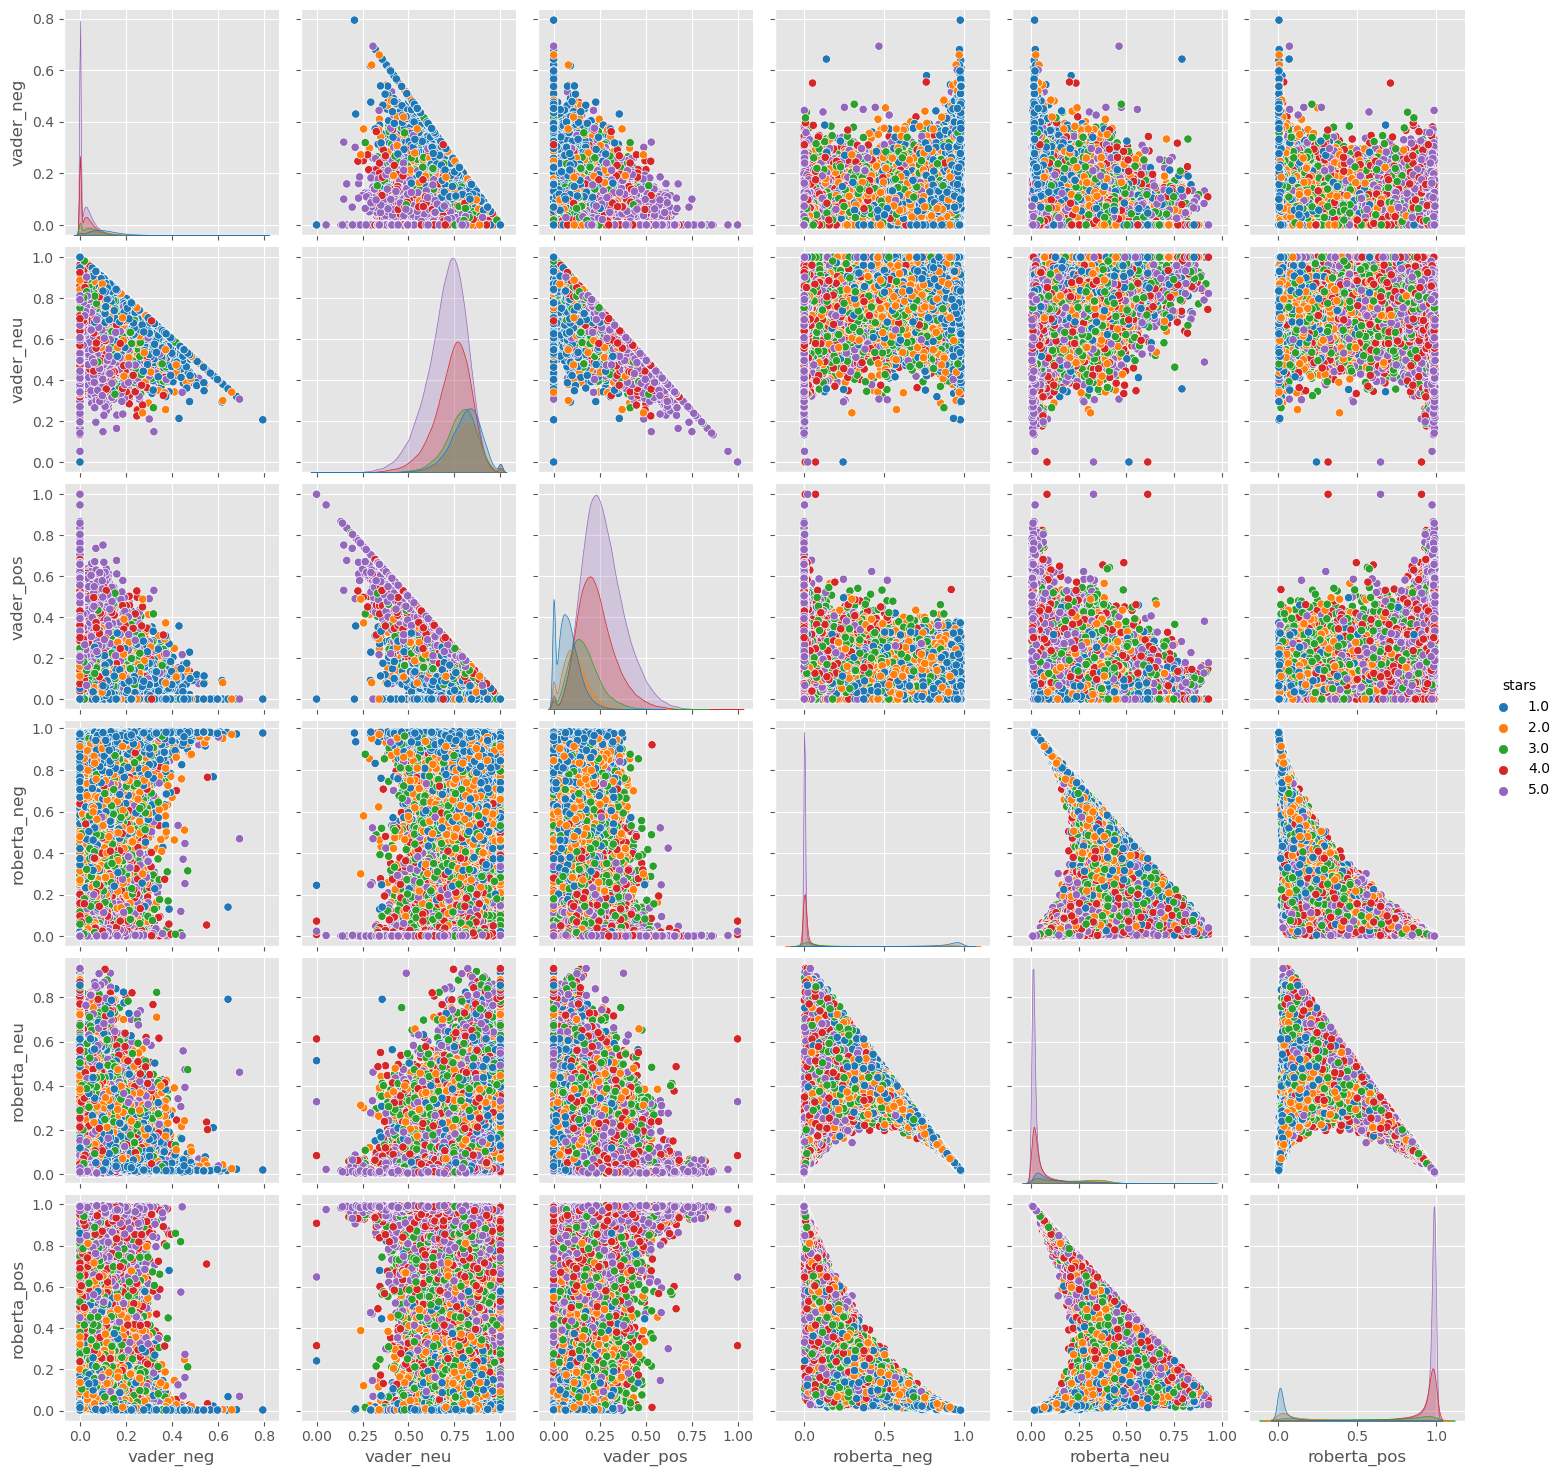

In [29]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

In [30]:
#Positive 1 yıldız Roberta
results_df.query('stars == 1') \
    .sort_values('roberta_pos', ascending=False)['text'].values[0]

'Prefer Indian Garden! Love Indian Gardens food and service! Indian Garden is just amazing and we love it! Been going for 7 years!'

In [31]:
#Positive 1 yıldız VADER
results_df.query('stars == 1') \
    .sort_values('vader_pos', ascending=False)['text'].values[0]

'My dress was hemmed perfectly. Thanks Fena'

In [32]:
#Negative 5 yıldız Roberta
results_df.query('stars == 5') \
    .sort_values('roberta_neg', ascending=False)['text'].values[0]

"i dont like the seating arrangement in this theater!!!!Whats the reason for that!!!!! First come first serve!!!!we sit in the front to the 2nd row then i found out after the movie there's a lot of vacant seat in the upper level!! you messed up !! and your recliner is stink!!!"

In [33]:
#Negative 5 yıldız VADER
results_df.query('stars == 5') \
    .sort_values('vader_neg', ascending=False)['text'].values[0]

'KUZINA DOES NO WRONG.\n\nNomnomnom.'

### Transformers Pipelining

In [34]:
#from transformers import pipeline

#sent_pipeline = pipeline("sentiment-analysis")

In [35]:
#sent_pipeline('I love sentiment analysis!')

In [36]:
#sent_pipeline('booo')

## Sonuç (332102)

In [37]:
results_df.head()

,review_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,0.000,0.888,0.112,0.8597,0.061117,0.221228,0.717655,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,0.050,0.705,0.245,0.9858,0.005421,0.058778,0.935801,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,0.035,0.709,0.257,0.9201,0.001187,0.036421,0.962392,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,0.000,0.660,0.340,0.9588,0.001735,0.011915,0.986350,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,0.017,0.711,0.272,0.9804,0.001854,0.016004,0.982143,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
#Sonuç dataframe olarak dosyaya yazılır (csv, json)
#results_df.to_csv("results/result.csv", index=False)
#results_df.to_json("custom/yelp_vader_roberta.json", index=False)

### SQL olarak kaydetme

In [ ]:
#Sonuç dataframe olarak dosyaya yazılır (sql)

import pandas as pd
from sqlalchemy import create_engine

engine= create_engine("sqlite:///database/business_recommendations.db", echo=True)
results_df.to_sql("review_scores", con=engine, if_exists="replace", index=False)

engine.dispose()

2024-01-16 09:28:09,348 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-16 09:28:09,370 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("review_scores")
2024-01-16 09:28:09,370 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-16 09:28:09,374 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("review_scores")
2024-01-16 09:28:09,374 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-16 09:28:09,376 INFO sqlalchemy.engine.Engine 
CREATE TABLE review_scores (
	review_id TEXT, 
	vader_neg FLOAT, 
	vader_neu FLOAT, 
	vader_pos FLOAT, 
	vader_compound FLOAT, 
	roberta_neg FLOAT, 
	roberta_neu FLOAT, 
	roberta_pos FLOAT, 
	user_id TEXT, 
	business_id TEXT, 
	stars FLOAT, 
	useful BIGINT, 
	funny BIGINT, 
	cool BIGINT, 
	text TEXT, 
	date TEXT
)


2024-01-16 09:28:09,377 INFO sqlalchemy.engine.Engine [no key 0.00102s] ()
2024-01-16 09:28:11,649 INFO sqlalchemy.engine.Engine INSERT INTO review_scores (review_id, vader_neg, vader_neu, vader_pos, vader_compound, roberta_neg, rober

In [40]:
#create_engine hata verirse

#import sqlite3
#con=sqlite3.connect("restaurant_reviews.db")